#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [37]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = 'Face'  ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f'Total number of face detected are {len(faces_rect)}', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

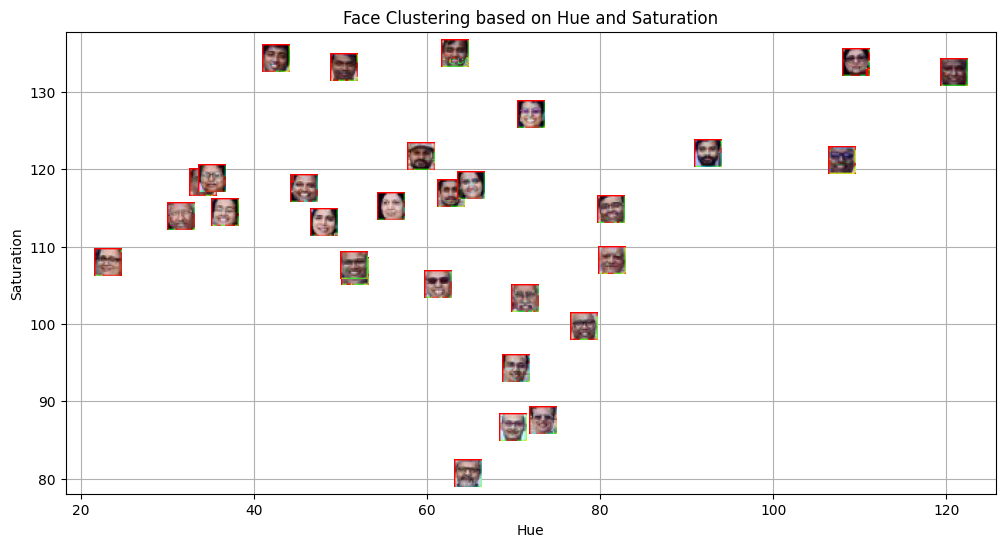

In [38]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Face Clustering based on Hue and Saturation')
## Put grid
plt.grid(True)
## show the plot
plt.show()

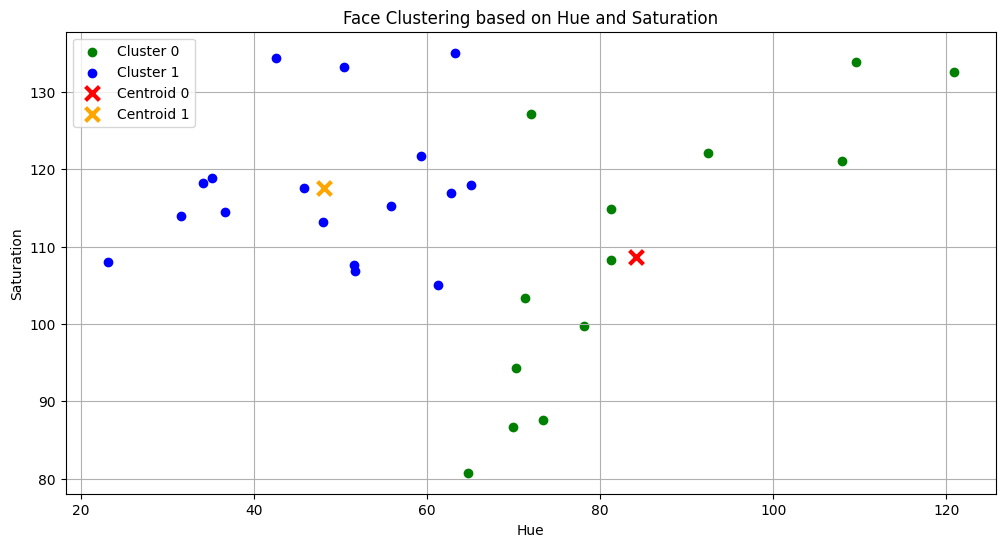

In [39]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=100, linewidth=3, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=100
, linewidth=3, label='Centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Face Clustering based on Hue and Saturation')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

In [40]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
template_img_copy = template_img.copy()  # Create a copy for drawing rectangles

# Detect face in the template image after converting it to gray and store it in template_faces
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(gray_template, 1.1, 4)

# Draw rectangles around the detected faces on the copy
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the detected face in the template image
cv2.imshow(f'Total number of face detected in template are {len(template_faces)}', template_img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\daiwi\AppData\Local\Temp\ipykernel_18368\792682166.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


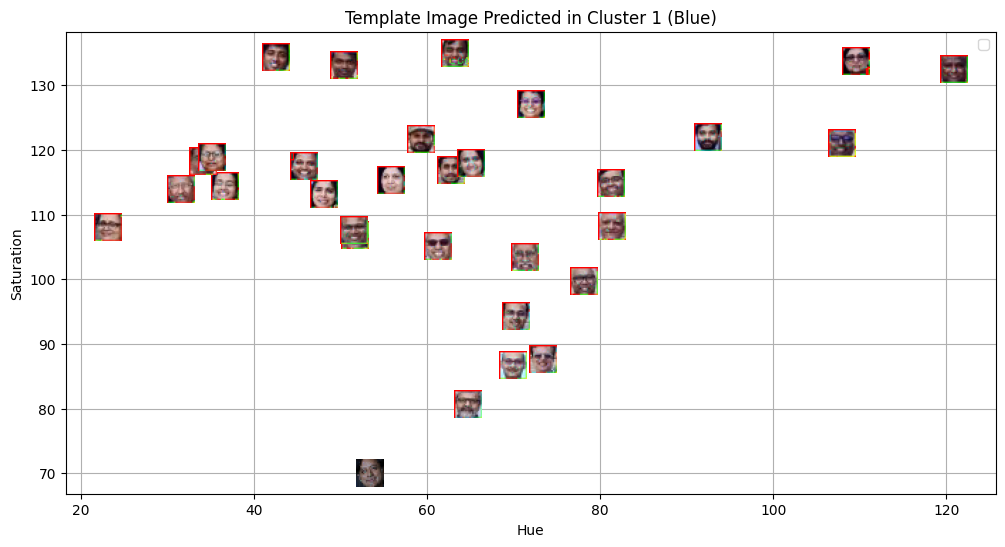

In [41]:
## Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

## Extract hue and saturation features from the template image (taking the first detected face)
for (x, y, w, h) in template_faces:
    face_roi_hsv = template_hsv[y:y+h, x:x+w]
    template_hue = np.mean(face_roi_hsv[:, :, 0])
    template_saturation = np.mean(face_roi_hsv[:, :, 1])
    template_face = face_roi_hsv  # Store the face region for visualization
    break

## Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x_coord, y_coord, w_coord, h_coord) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster (using only the face region)
color = 'red' if template_label == 0 else 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_face, (20, 20)), cv2.COLOR_HSV2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)
plt.plot(template_hue, template_saturation, 'o', markersize=5, color=color)

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title(f'Template Image Predicted in {"Cluster 0 (Red)" if template_label == 0 else "Cluster 1 (Blue)"}')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show plot
plt.show()

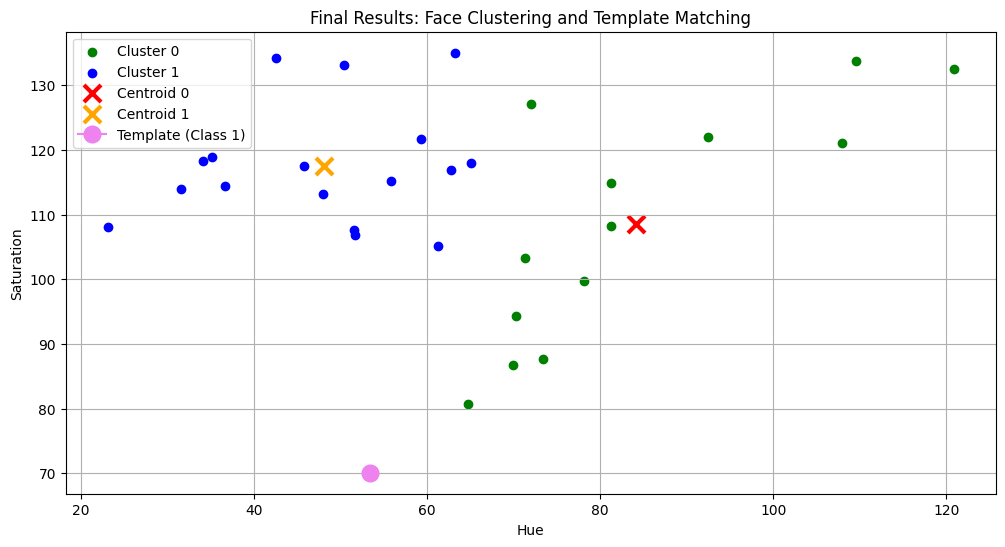

In [42]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot for centroid 0
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='x', s=150, linewidth=3, label='Centroid 0') 
# Plot for centroid 1
plt.scatter(centroid_1[0], centroid_1[1], color='orange', marker='x', s=150, linewidth=3, label='Centroid 1')  

# Plot the template image position (Violet circle)
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=12, label=f'Template (Class {template_label})')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Final Results: Face Clustering and Template Matching')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()

# End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

- Euclidean Distance
- Manhattan Distance
- Minkowski Distance
- Cosine Distance
- Mahalanobis Distance

---

#### 2. What are some real-world applications of distance-based classification algorithms? 

- Face recognition and clustering
- Medical diagnosis and disease classification
- Spam filtering
- Fraud detection
- Image and object classification
- Recommendation systems

---

#### 3. Explain various distance metrics. 

- **Euclidean:** Straight-line distance.
- **Manhattan:** Sum of absolute differences.
- **Minkowski:** Generalized metric. Euclidean (p=2) and Manhattan (p=1) are special cases.
- **Cosine:** Measures angle between vectors, ignoring magnitude.
- **Mahalanobis:** Accounts for feature correlation and variance. Scale-invariant.

---

#### 4. What is the role of cross validation in model performance? 

- Provides unbiased performance estimate on unseen data
- Reduces overfitting by using multiple train-test splits
- Helps tune hyperparameters without data leakage

---

#### 5. Explain variance and bias in terms of KNN? 

**Low K:** Low bias, high variance. Overfits - sensitive to noise.

**High K:** High bias, low variance. Underfits - too smooth.

**Optimal K:** Balances bias-variance tradeoff. Found using cross-validation(Grid search).